<a href="https://colab.research.google.com/github/verkalacheva/eurovision_analytics/blob/main/eurovision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ данных конкурса "Евровидение"

In [ ]:
!kaggle datasets download -d diamondsnake/eurovision-song-contest-data

Dataset URL: https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data
License(s): copyright-authors
  0% 0.00/55.9k [00:00<?, ?B/s]
100% 55.9k/55.9k [00:00<00:00, 40.9MB/s]


In [ ]:
! unzip eurovision-song-contest-data.zip -d song_data

Archive:  eurovision-song-contest-data.zip
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2016_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2017_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2018_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2019_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2021_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2022_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Jury/2023_jury_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Televote/2016_televote_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Televote/2017_televote_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Televote/2018_televote_results.csv  
  inflating: song_data/Kaggle Dataset/Final Results/Televote/2019_televote_results.csv  
  inflating: song_data/Kaggle Data

## Описание набора данных


Набор данных song_data.csv содержит подробную информацию о каждой песне, принимавшей участие в конкурсе песни «Евровидение» с 2009 года.

Описание датасета:
* year: Год, в котором участвовала в конкурсе.
* semi_final: Номер полуфинала, в котором песня участвовала.
* semi_draw_position: Порядковый номер выступления в полуфинале.
* final_draw_position: Порядковый номер выступления в финале.
* country: Страна, которая представляет песню.
* artist_name: Имя исполнителя или группы, исполняющей песню.
* song_name: Название песни.
* language: Язык(и), на котором(ых) исполняется песня.
* style: Жанр или стиль песни (например, Pop, Rock, Ballad).
* direct_qualifier_10: Флаг, указывающий, что песня напрямую прошла в финал без прохождения полуфиналов.
* gender: Пол основного(ых) исполнителя(ей).
* main_singers: Количество основных исполнителей в выступлении.
* age: Возраст основного(ых) исполнителя(ей).
* selection: Способ или процесс, через который песня была выбрана для представления страны.
* key: Музыкальный ключ, в котором исполняется песня.
* BPM: Удары в минуту, указывающие на темп песни.
* energy: Мера интенсивности или активности песни.
* danceability: Мера пригодности песни для танцев.
* happiness: Мера позитивности песни.
* loudness: Общая громкость песни в децибелах (dB).
* acousticness: Мера акустической природы песни.
* instrumentalness: Мера инструментальности песни.
* liveness: Мера живости песни.
* speechiness: Мера говорливости песни.
* release_date: Дата выпуска песни.
* key_change_10: Указывает на изменение ключа песни во время исполнения.
* backing_dancers: Количество бэк-танцоров в выступлении.
* backing_singers: Количество бэк-вокалистов в выступлении.
* backing_instruments: Количество бэк-инструментов в выступлении.
* instrument_10: Количество инструментов, используемых в песне.
* qualified_10: Флаг, указывающий, что песня попала в топ-10.
* final_televote_points: Очки, полученные от телезрителей в финале.
* final_jury_points: Очки, полученные от жюри в финале.
* final_televote_votes: Количество голосов от телезрителей в финале.
* final_jury_votes: Количество голосов от жюри в финале.
* final_place: Место, занятое песней в финале.
* final_total_points: Общее количество очков, полученных в финале.
* semi_place: Место, занятое песней в полуфинале.
* semi_televote_points: Очки, полученные от телезрителей в полуфинале.
* semi_jury_points: Очки, полученные от жюри в полуфинале.
* semi_total_points: Общее количество очков, полученных в полуфинале.
* favourite_10: Флаг, указывающий, что песня была среди фаворитов в топ-10.
* host_10: Флаг, указывающий, что песня исполняется страной-хозяйкой конкурса.

## Загрузка и предварительная обработка данных

Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from heapq import nlargest

Загрузка данных в датафрейм

In [ ]:
song_data = pd.read_csv('/content/song_data/Kaggle Dataset/song_data.csv', encoding='ISO-8859-1')
song_data

,year,semi_final,semi_draw_position,final_draw_position,country,artist_name,song_name,language,style,direct_qualifier_10,...,final_jury_votes,final_place,final_total_points,semi_place,semi_televote_points,semi_jury_points,semi_total_points,favourite_10,race,host_10
0,2023,1,1,20,Norway,Alessandra,Queen of Kings,English,Pop,0,...,11.0,5.0,268.0,6.0,102.0,NaN,102.0,0,unknown,0
1,2023,1,2,NaN,Malta,The Busker,Dance (Our Own Party),English,Pop,-,...,NaN,NaN,NaN,15.0,3.0,NaN,3.0,0,unknown,0
2,2023,1,3,5,Serbia,Luke Black,Samo mi se spava,"Serbian, English",Pop,0,...,6.0,24.0,30.0,10.0,37.0,NaN,37.0,0,unknown,0
3,2023,1,4,NaN,Latvia,Sudden Lights,Aija,English,Rock,-,...,NaN,NaN,NaN,11.0,34.0,NaN,34.0,0,unknown,0
4,2023,1,5,2,Portugal,Mimicat,Ai coração,Portuguese,Pop,0,...,9.0,23.0,59.0,9.0,74.0,NaN,74.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2009,-,-,3,France,Patricia Kaas,Et s'il fallait le faire,French,Ballad,1,...,NaN,8.0,218.0,NaN,NaN,NaN,NaN,0,unknown,0
561,2009,-,-,10,Russia,Anastasiya Prikhodko,Mamo,"Russian, Ukrainian",Ballad,1,...,NaN,11.0,185.0,NaN,NaN,NaN,NaN,0,unknown,1
562,2009,-,-,17,Germany,Alex Swings Oscar Sings!,Miss Kiss Kiss Bang,English,Pop,1,...,NaN,20.0,91.0,NaN,NaN,NaN,NaN,0,unknown,0
563,2009,-,-,23,United Kingdom,Jade Ewen,It's My Time,English,Ballad,1,...,NaN,5.0,328.0,NaN,NaN,NaN,NaN,0,unknown,0


 Основные статистики, посчитанные по данному набору данных.

In [ ]:
song_data.describe()

,year,main_singers,backing_dancers,backing_singers,backing_instruments,instrument_10,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points,semi_place,semi_televote_points,semi_jury_points,semi_total_points,favourite_10,host_10
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,328.000000,328.000000,233.000000,233.000000,358.000000,358.000000,483.000000,243.000000,212.000000,483.000000,565.000000,565.000000
mean,2015.653097,1.297345,0.884956,1.088496,0.837168,0.118584,90.539634,90.655488,15.184549,15.107296,13.391061,164.849162,9.192547,68.263374,67.575472,97.788820,0.024779,0.024779
std,4.312691,0.854739,1.460789,1.624052,1.460484,0.323585,86.852074,74.096517,12.828622,9.868602,7.430208,143.603444,5.069863,50.617148,47.545328,73.844662,0.155588,0.155588
min,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.750000,36.000000,4.000000,7.000000,7.000000,68.250000,5.000000,24.500000,26.750000,43.000000,0.000000,0.000000
50%,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,59.000000,71.000000,11.000000,13.000000,13.000000,124.500000,9.000000,54.000000,58.000000,77.000000,0.000000,0.000000
75%,2019.000000,1.000000,2.000000,2.000000,1.000000,0.000000,127.500000,126.000000,26.000000,22.000000,20.000000,225.250000,13.500000,104.500000,98.250000,134.000000,0.000000,0.000000
max,2023.000000,6.000000,5.000000,5.000000,5.000000,1.000000,439.000000,382.000000,42.000000,39.000000,27.000000,758.000000,19.000000,204.000000,222.000000,403.000000,1.000000,1.000000


Количество пропущенных значений

In [ ]:
song_data.isnull().sum()

year                       0
semi_final                 0
semi_draw_position         0
final_draw_position       11
country                    0
artist_name                0
song_name                  0
language                   0
style                      0
direct_qualifier_10        0
gender                     0
main_singers               0
age                        0
selection                  0
key                        0
BPM                        0
energy                     0
danceability               0
happiness                  0
loudness                  90
acousticness               0
instrumentalness           0
liveness                   0
speechiness                0
release_date               0
key_change_10              0
backing_dancers            0
backing_singers            0
backing_instruments        0
instrument_10              0
qualified_10               0
final_televote_points    237
final_jury_points        237
final_televote_votes     332
final_jury_vot

Отберем колонки, которые будем анализировать.

In [ ]:
song_data = song_data[['country', 'year', 'host_10', 'language',
       'direct_qualifier_10', 'gender', 'main_singers',
       'backing_dancers', 'backing_singers',
       'backing_instruments', 'instrument_10', 'style', 'BPM', 'energy', 'danceability', 'happiness', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
        'qualified_10', 'favourite_10', 'semi_final', 'semi_draw_position', 'semi_televote_points', 'semi_jury_points',
        'semi_total_points', 'semi_place', 'final_draw_position',
       'final_televote_points', 'final_jury_points', 'final_total_points',
        'final_place']]
song_data

,country,year,host_10,language,direct_qualifier_10,gender,main_singers,backing_dancers,backing_singers,backing_instruments,...,semi_draw_position,semi_televote_points,semi_jury_points,semi_total_points,semi_place,final_draw_position,final_televote_points,final_jury_points,final_total_points,final_place
0,Norway,2023,0,English,0,Female,1,4,0,0,...,1,102.0,NaN,102.0,6.0,20,216.0,52.0,268.0,5.0
1,Malta,2023,0,English,-,Male,1,0,0,2,...,2,3.0,NaN,3.0,15.0,NaN,NaN,NaN,NaN,NaN
2,Serbia,2023,0,"Serbian, English",0,Male,1,4,0,0,...,3,37.0,NaN,37.0,10.0,5,16.0,14.0,30.0,24.0
3,Latvia,2023,0,English,-,Male,1,0,0,3,...,4,34.0,NaN,34.0,11.0,NaN,NaN,NaN,NaN,NaN
4,Portugal,2023,0,Portuguese,0,Female,1,4,0,0,...,5,74.0,NaN,74.0,9.0,2,16.0,43.0,59.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,France,2009,0,French,1,Female,1,0,0,0,...,-,NaN,NaN,NaN,NaN,3,54.0,164.0,218.0,8.0
561,Russia,2009,1,"Russian, Ukrainian",1,Female,1,0,5,0,...,-,NaN,NaN,NaN,NaN,10,118.0,67.0,185.0,11.0
562,Germany,2009,0,English,1,Male,1,3,1,1,...,-,NaN,NaN,NaN,NaN,17,18.0,73.0,91.0,20.0
563,United Kingdom,2009,0,English,1,Female,1,0,0,5,...,-,NaN,NaN,NaN,NaN,23,105.0,223.0,328.0,5.0


Заполним пропуски

In [ ]:
song_data = song_data.fillna(0)
song_data

,country,year,host_10,language,direct_qualifier_10,gender,main_singers,backing_dancers,backing_singers,backing_instruments,...,semi_draw_position,semi_televote_points,semi_jury_points,semi_total_points,semi_place,final_draw_position,final_televote_points,final_jury_points,final_total_points,final_place
0,Norway,2023,0,English,0,Female,1,4,0,0,...,1,102.0,0.0,102.0,6.0,20,216.0,52.0,268.0,5.0
1,Malta,2023,0,English,-,Male,1,0,0,2,...,2,3.0,0.0,3.0,15.0,0,0.0,0.0,0.0,0.0
2,Serbia,2023,0,"Serbian, English",0,Male,1,4,0,0,...,3,37.0,0.0,37.0,10.0,5,16.0,14.0,30.0,24.0
3,Latvia,2023,0,English,-,Male,1,0,0,3,...,4,34.0,0.0,34.0,11.0,0,0.0,0.0,0.0,0.0
4,Portugal,2023,0,Portuguese,0,Female,1,4,0,0,...,5,74.0,0.0,74.0,9.0,2,16.0,43.0,59.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,France,2009,0,French,1,Female,1,0,0,0,...,-,0.0,0.0,0.0,0.0,3,54.0,164.0,218.0,8.0
561,Russia,2009,1,"Russian, Ukrainian",1,Female,1,0,5,0,...,-,0.0,0.0,0.0,0.0,10,118.0,67.0,185.0,11.0
562,Germany,2009,0,English,1,Male,1,3,1,1,...,-,0.0,0.0,0.0,0.0,17,18.0,73.0,91.0,20.0
563,United Kingdom,2009,0,English,1,Female,1,0,0,5,...,-,0.0,0.0,0.0,0.0,23,105.0,223.0,328.0,5.0


## Анализ

### Гипотеза 1

#### Выигрывает песня, жанр которой встречался реже всего в конкурсе данного года.

Составим таблицу, показывающую процент частоты исполнения песен в определенном жанре в определенный год

In [ ]:
style_frequency = pd.DataFrame(columns=['year', 'style', 'percentage'])
for year in song_data['year'].unique():
    styles_year = song_data[song_data['year']==year]
    for style in styles_year['style'].unique():
        style_count = len(styles_year[styles_year['style']==style])
        style_frequency.loc[len(style_frequency.index)] = [year, style, style_count/len(styles_year)]
style_frequency

,year,style,percentage
0,2023,Pop,0.513514
1,2023,Rock,0.162162
2,2023,Ballad,0.243243
3,2023,Traditional,0.081081
4,2022,Pop,0.325000
...,...,...,...
63,2009,Pop,0.285714
64,2009,Traditional,0.166667
65,2009,Rock,0.119048
66,2009,Dance,0.142857


По данным таблицы построим круговые диаграммы для каждого года.

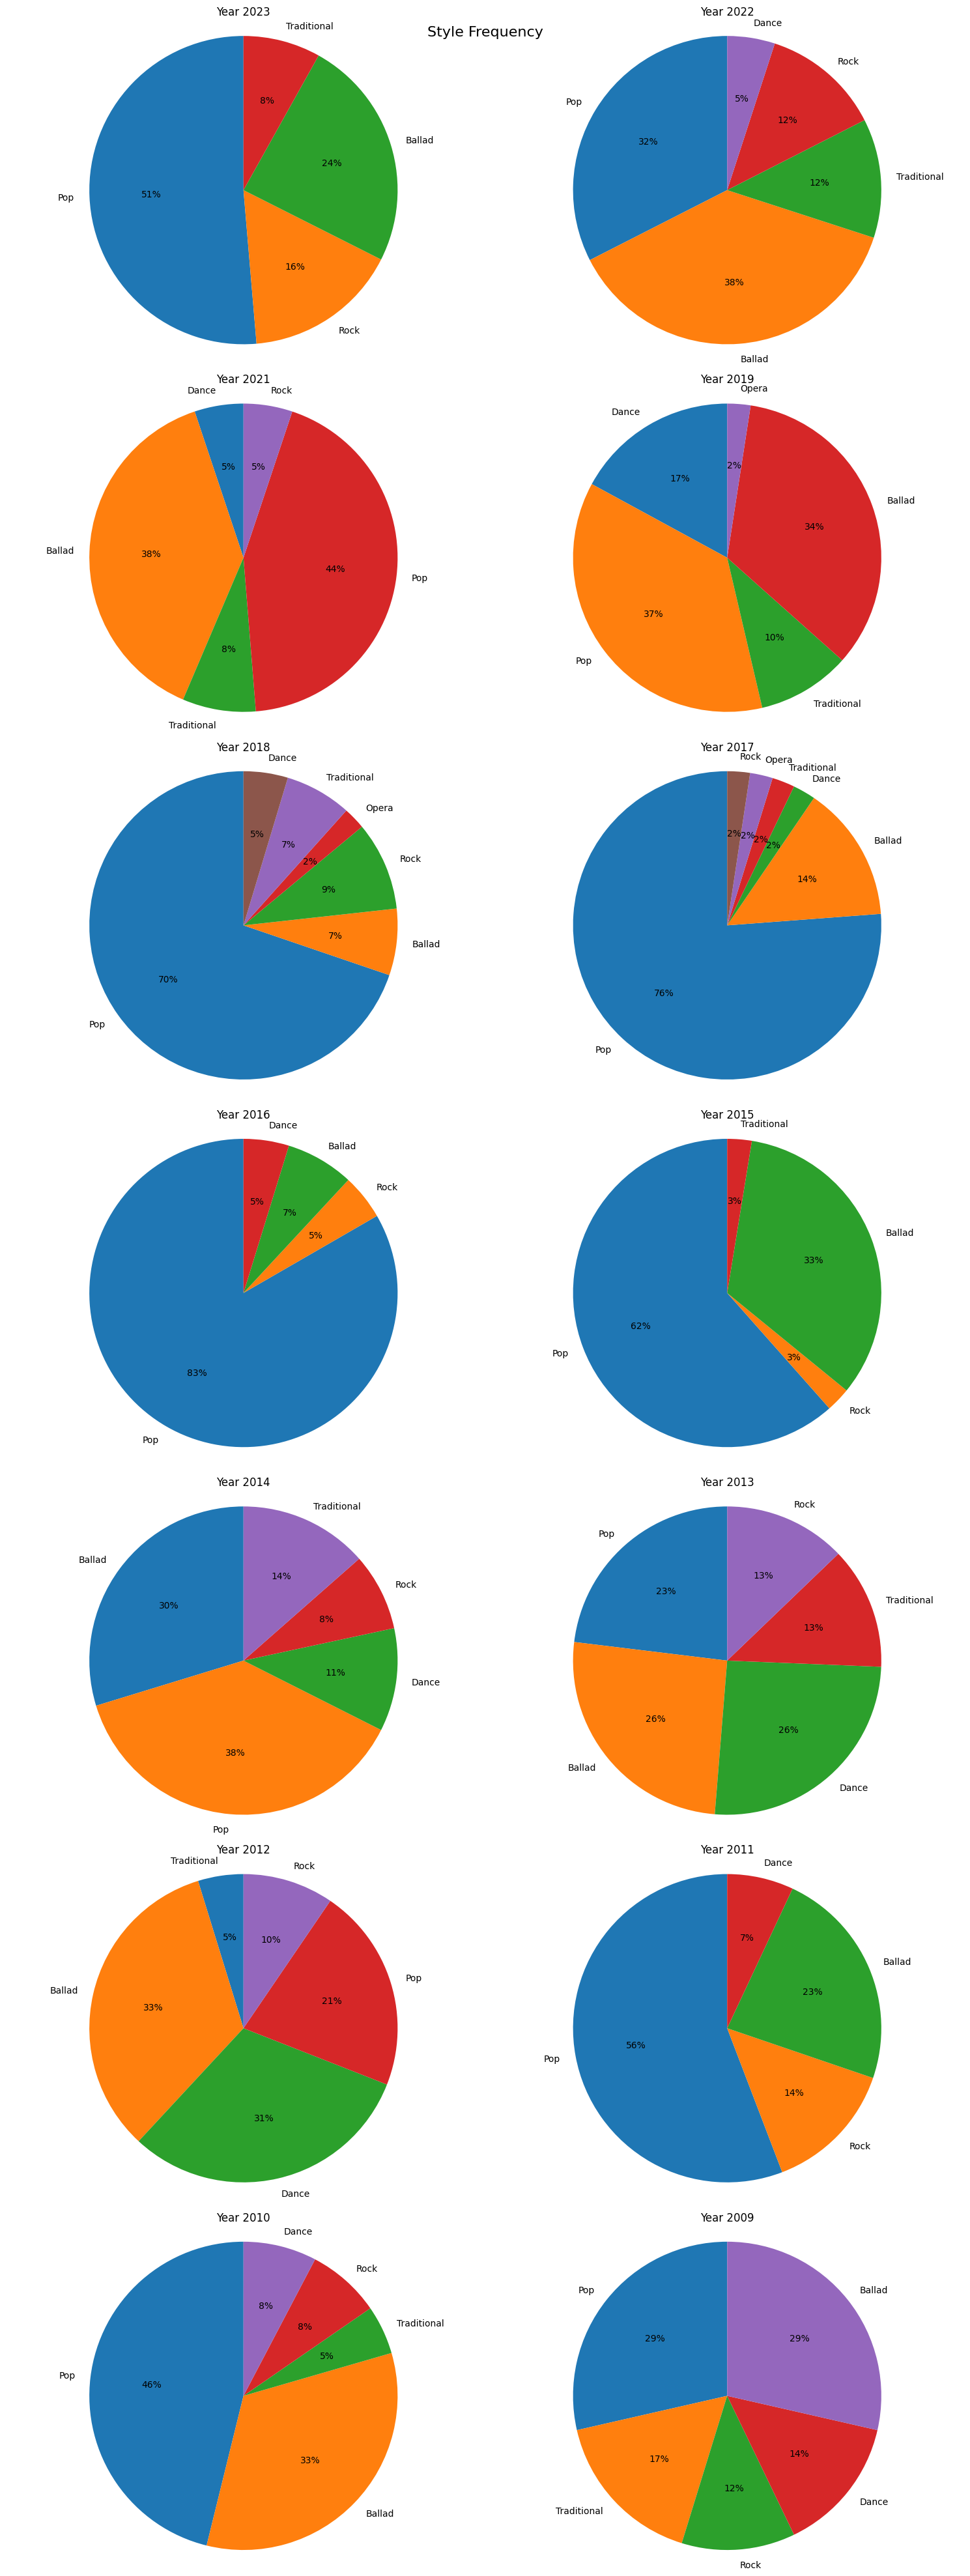

In [ ]:
# Создаем фигуру и массив подграфиков
fig, axs = plt.subplots(7, 2, figsize=(15, 40))

# Получаем уникальные годы
years = style_frequency['year'].unique()[:14]
# Проходим по каждому подграфику и создаем круговую диаграмму
for i, year in enumerate(years):
    ax = axs[i //2, i % 2]  # Используем целочисленное деление и остаток от деления для получения индексов подграфиков

    # Фильтруем данные для текущего года
    data = style_frequency[style_frequency['year'] == year]

    # Получаем стили и их доли для текущего года
    styles = data['style']
    percentages = data['percentage']

    # Создаем круговую диаграмму
    ax.pie(percentages, labels=styles, autopct=lambda p : '' if p < 1 else '{:.0f}%'.format(p), startangle=90)
    ax.set_title(f'Year {year}')
    ax.axis('equal')  # Это гарантирует, что круговая диаграмма будет кругом, а не эллипсом

# Устанавливаем общий заголовок для всей фигуры
plt.suptitle('Style Frequency', fontsize=16)

# Показываем фигуру
plt.tight_layout()
plt.show()

Составим сравнительную таблицу жанров: наименее исполняемого жанра, песни-победителя, песни-победителя по телеголосованию, песни-победителя по голсованию жюри.

In [ ]:
style_compare = pd.DataFrame(columns=['year', 'least_popular_style', 'winner_style',
                                      'televote_win_style', 'jury_win_style'])
for year in style_frequency['year'].unique():
    style_year = style_frequency[style_frequency['year']==year]
    song_data_year = song_data[song_data['year']==year]
    least_popular_style = style_year[style_year['percentage']==min(style_year['percentage'])]['style'].values
    winner_style = song_data_year[song_data_year['final_place']==1]['style'].values[0]

    if song_data_year['final_televote_points'].max() == 0:
        televote_win_style = 'No Data'
    else:
        televote_win_style = song_data_year[song_data_year['final_televote_points']==song_data_year['final_televote_points'].max()]['style'].values[0]

    if song_data_year['final_jury_points'].max() == 0:
        jury_win_style = 'No Data'
    else:
        jury_win_style = song_data_year[song_data_year['final_jury_points']==song_data_year['final_jury_points'].max()]['style'].values[0]

    style_compare.loc[len(style_compare.index)] = [year, least_popular_style, winner_style, televote_win_style, jury_win_style]
style_compare

,year,least_popular_style,winner_style,televote_win_style,jury_win_style
0,2023,[Traditional],Pop,Pop,Pop
1,2022,[Dance],Traditional,Traditional,Pop
2,2021,"[Dance, Rock]",Rock,Rock,Ballad
3,2019,[Opera],Ballad,Dance,Ballad
4,2018,[Opera],Pop,Pop,Pop
5,2017,"[Dance, Traditional, Opera, Rock]",Ballad,Ballad,Ballad
6,2016,"[Rock, Dance]",Pop,Pop,Pop
7,2015,"[Rock, Traditional]",Pop,Pop,Ballad
8,2014,[Rock],Ballad,Ballad,Ballad
9,2013,"[Traditional, Rock]",Pop,No Data,No Data


#### Вывод

Таким образом, гипотеза о том, что выигрывает песня, жанр которой встречался реже всего в конкурсе данного года, **не подтвердилась**. Наименее популярный стиль в подавляющем большинстве случаев не выигрывал ни по голосованию телезрителей, ни по голосованию жюри, ни в сумме голосов.

По построенной таблице и диаграммам видно, что чаще всего побеждают песни в жанрах "Pop" и "Ballad", которые практически каждый год явдяются самыми популярными стилями.

### Гипотеза 2

#### Песни на английском языке занимают более высокие места по сравнению с песнями на других языках.

Выделим из основной таблицы таблицу со следующими колонками: год, страна, язык песни, место в финале.

In [ ]:
language_compare = song_data[['year', 'country', 'language', 'final_place']]
language_compare = language_compare[language_compare['final_place']>0]
language_compare

,year,country,language,final_place
0,2023,Norway,English,5.0
2,2023,Serbia,"Serbian, English",24.0
4,2023,Portugal,Portuguese,23.0
6,2023,Croatia,Croatian,13.0
7,2023,Switzerland,English,20.0
...,...,...,...,...
560,2009,France,French,8.0
561,2009,Russia,"Russian, Ukrainian",11.0
562,2009,Germany,English,20.0
563,2009,United Kingdom,English,5.0


Для удобства заменим значения ячеек в колонке language, в которых указано более одного языка, один из которых английский, только на английский.

In [ ]:
def normalize_language(x):
    languages = x.split(',')
    for i in range(len(languages)):
      languages[i] = languages[i].strip()
    if 'English' in languages:
        return 'English'
    else:
        return x

language_compare['language'] = language_compare['language'].apply(normalize_language)

Отберем в отдельную таблицу те песни, которые вошли в топ 10 в свой год.

In [ ]:
language_compare10 = language_compare[language_compare['final_place']<=10]

Подсчитаем сколько песен из этой таблицы исполнялись на каждом языке, присутствующем в таблице language_compare10.

In [ ]:
language_count10 = pd.DataFrame(columns=['year', 'language', 'count'])

years = language_compare10['year']
for year in years.unique():
    languages = language_compare10[years==year]['language']
    for language in languages.unique():
        count = len(language_compare10[years==year][languages==language])
        language_count10.loc[len(language_count10.index)] = [year, language, count]

language_count10.head(10)

,year,language,count
0,2023,English,8
1,2023,Finnish,1
2,2023,Italian,1
3,2022,Ukrainian,1
4,2022,English,7
5,2022,"Serbian, Latin",1
6,2022,Italian,1
7,2021,English,5
8,2021,Ukrainian,1
9,2021,French,2


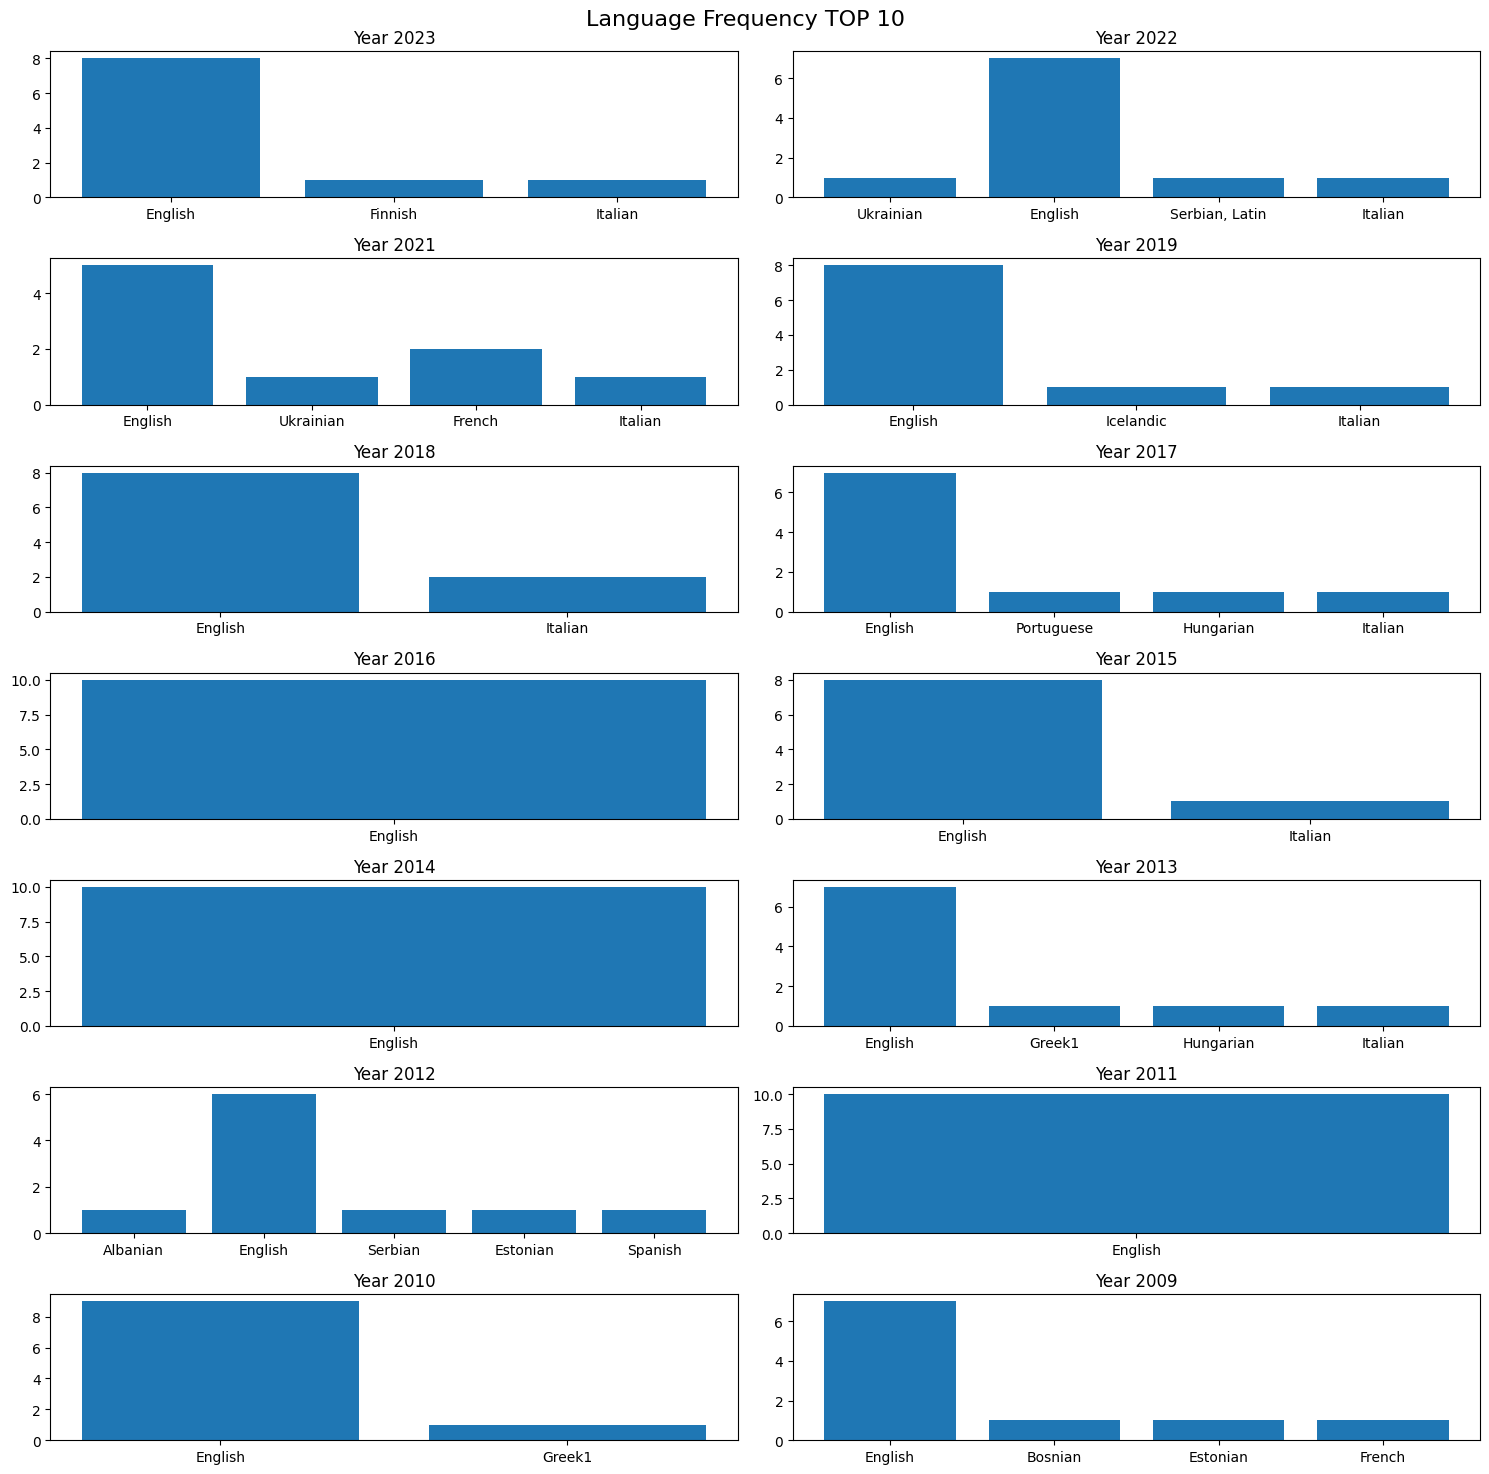

In [ ]:
# Создаем фигуру и массив подграфиков
fig, axs = plt.subplots(7, 2, figsize=(15, 15))

# Получаем уникальные годы
years = language_count10['year'].unique()[:14]
# Проходим по каждому подграфику и создаем круговую диаграмму
for i, year in enumerate(years):
    ax = axs[i //2, i % 2]  # Используем целочисленное деление и остаток от деления для получения индексов подграфиков

    # Фильтруем данные для текущего года
    data = language_count10[language_count10['year'] == year]

    # Получаем языки и их количества для текущего года
    languages = data['language']
    count = data['count']

    ax.bar(languages, count)
    ax.set_title(f'Year {year}')

# Устанавливаем общий заголовок для всей фигуры
plt.suptitle('Language Frequency TOP 10', fontsize=16)

# Показываем фигуру
plt.tight_layout()
plt.show()

Теперь подсчитаем в каком процентном соотношении использовались языки в песнях в каждый год.

In [ ]:
language_percentage = pd.DataFrame(columns=['year', 'language', 'percentage'])

years = language_compare['year']
for year in years.unique():
    languages = language_compare[years==year]['language']
    for language in languages.unique():
        percentage = len(language_compare[years==year][languages==language])/len(language_compare[years==year])
        language_percentage.loc[len(language_percentage.index)] = [year, language, percentage]

language_percentage

,year,language,percentage
0,2023,English,0.653846
1,2023,Portuguese,0.038462
2,2023,Croatian,0.038462
3,2023,Romanian,0.038462
4,2023,Finnish,0.038462
...,...,...,...
87,2009,Bosnian,0.040000
88,2009,Croatian,0.040000
89,2009,Estonian,0.040000
90,2009,French,0.040000


Построим круговые диаграммы

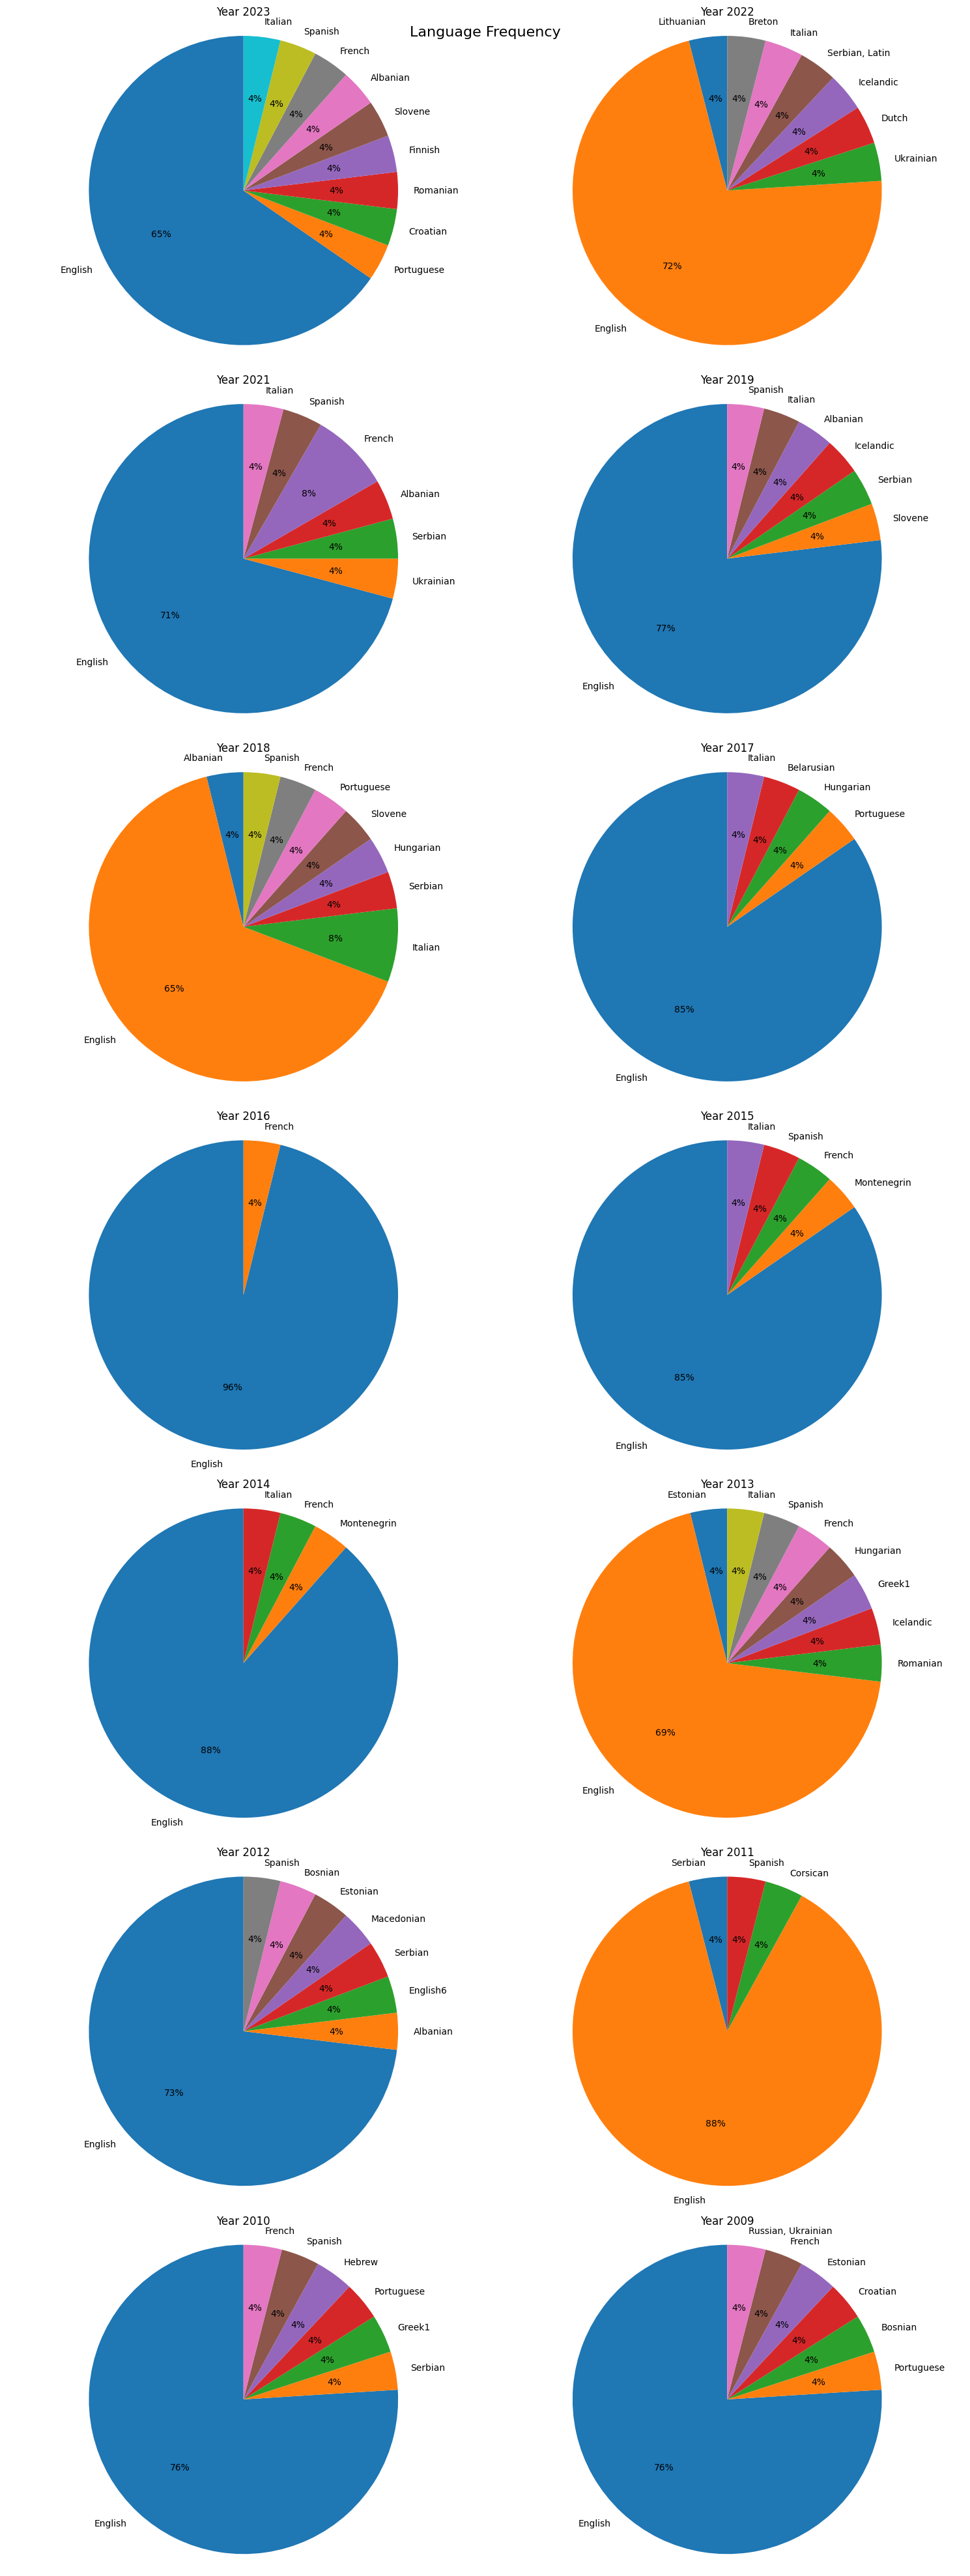

In [ ]:
# Создаем фигуру и массив подграфиков
fig, axs = plt.subplots(7, 2, figsize=(15, 40))

# Получаем уникальные годы
years = language_percentage['year'].unique()[:14]
# Проходим по каждому подграфику и создаем круговую диаграмму
for i, year in enumerate(years):
    ax = axs[i //2, i % 2]  # Используем целочисленное деление и остаток от деления для получения индексов подграфиков

    # Фильтруем данные для текущего года
    data = language_percentage[language_percentage['year'] == year]

    # Получаем стили и их доли для текущего года
    languages = data['language']
    percentage = data['percentage']

    # Создаем круговую диаграмму
    ax.pie(percentage, labels=languages, autopct=lambda p : '' if p < 1 else '{:.0f}%'.format(p), startangle=90)
    ax.set_title(f'Year {year}')
    ax.axis('equal')  # Это гарантирует, что круговая диаграмма будет кругом, а не эллипсом

# Устанавливаем общий заголовок для всей фигуры
plt.suptitle('Language Frequency', fontsize=16)

# Показываем фигуру
plt.tight_layout()
plt.show()

#### Вывод

Таким образом, песни на английском языке, действительно чаще занимают высокие позиции. Однако, это можно объяснить тем, что процент иисполнения песен на английском намного выше, чем на всех остальных языках в сумме.

### Гипотеза 3

#### Выступающие во второй половине финала конкурса занимают более высокие места.

Заменим значения '-' в столбце final_draw_position на 0 и приведем все значения к типу int. После этого определим, сколько примерно выступлений в финале.

In [ ]:
song_data['final_draw_position'] = song_data['final_draw_position'].replace('-', 0)
song_data['final_draw_position'] = song_data['final_draw_position'].astype(int)
song_data['final_draw_position'].max()

27

Допустим, что "выигрышные" позиции начинаются с 14 номера. Посмотрим, под какими номерами выступали победители конкурсов.

In [ ]:
win_positions = song_data[song_data['final_place']==1][['year', 'final_draw_position']]
win_positions

,year,final_draw_position
10,2023,9
42,2022,12
115,2021,24
148,2019,12
163,2018,22
208,2017,11
273,2016,21
312,2015,10
344,2014,11
364,2013,18


<Axes: >

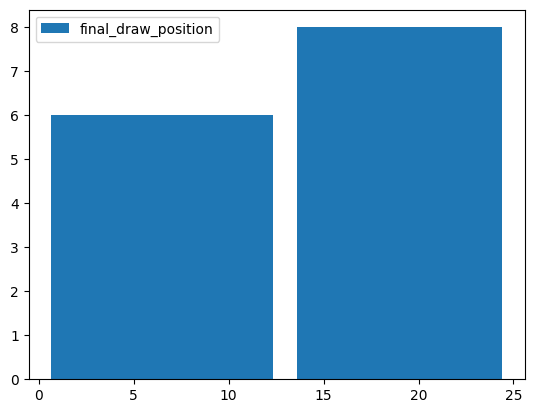

In [ ]:
win_positions['final_draw_position'].hist(bins=[0, 13, 25], grid=False, rwidth=0.9, legend=True)

Как видно из гистограммы, большинство победителей выступали во второй половине конкурса, однако различие незначительно. Для лучшего сравнения возьмем топ 10 песен за каждый год.

In [ ]:
top_positions10 = song_data[song_data['final_place']<=10][song_data['final_place']>0][['year', 'final_draw_position']]
top_positions10

<ipython-input-22-123ad9f55035>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_positions10 = song_data[song_data['final_place']<=10][song_data['final_place']>0][['year', 'final_draw_position']]


,year,final_draw_position
0,2023,20
8,2023,23
10,2023,9
12,2023,14
14,2023,13
...,...,...
552,2009,11
553,2009,8
558,2009,15
560,2009,3


<Axes: >

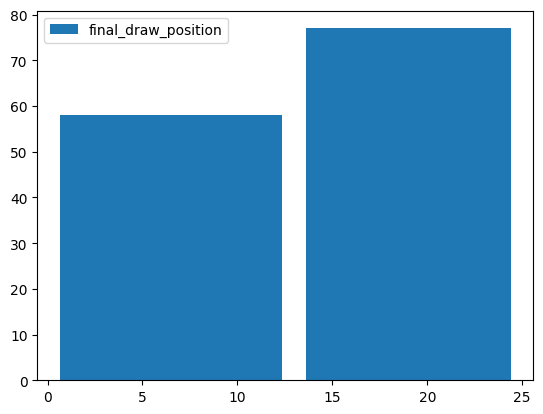

In [ ]:
top_positions10['final_draw_position'].hist(bins=[0, 13, 25], grid=False, rwidth=0.9, legend=True)

Из гистограммы видно, что песни, вошедшие в топ 10 в свой год, уже заметно чаще исполнялись во второй половине финала

#### Вывод

Таким образом, гипотеза о том, что выступающие во второй половине конкурса занимают более высокие места, принимается.

## Заключение

Анализ датасета по Евровидению позволяет выявить интересные закономерности, которые могут повлиять на исход конкурса, такие как жанр песни и номер, под которым выступает участник. Однако важно помнить, что множество факторов влияют на результаты голосования, включая качество песни, исполнительское мастерство, стратегию продвижения и даже случайные обстоятельства. Результаты такого анализа могут служить лишь одним из инструментов понимания тенденций и предпочтений участников, жюри и зрителей Евровидения. Тем не менее, на основе приведенного анализа можно выдвинуть еще ряд гипотез, например, о росте популярности песен, исполняющихся на языках, отличных от английского, в течение последних нескольких лет или о росте популярности песен, жанры которых раньше исполнялись намного реже.